<a href="https://colab.research.google.com/github/n-abhitesh/ai-lab/blob/main/Classification_with_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Fetch MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Convert labels to integers
y = y.astype(np.int8)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset (this improves performance of MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42, learning_rate_init=.1)

# Train the classifier
mlp.fit(X_train, y_train)


Iteration 1, loss = 0.30032786
Iteration 2, loss = 0.19601692
Iteration 3, loss = 0.19107935
Iteration 4, loss = 0.19579395
Iteration 5, loss = 0.25527488
Iteration 6, loss = 0.29744240
Iteration 7, loss = 0.24409590
Iteration 8, loss = 0.19920472
Iteration 9, loss = 0.18277715
Iteration 10, loss = 0.16554699
Iteration 11, loss = 0.13766272
Iteration 12, loss = 0.15359920
Iteration 13, loss = 0.17761320
Iteration 14, loss = 0.16858459
Iteration 15, loss = 0.20153372
Iteration 16, loss = 0.18063834
Iteration 17, loss = 0.22884990
Iteration 18, loss = 0.17045900
Iteration 19, loss = 0.18870919
Iteration 20, loss = 0.19570204


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=20,
              random_state=42, solver='sgd', verbose=10)

In [4]:
# Predict the labels for the test set
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 95.28%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.98      0.97      0.98      1600
           2       0.91      0.96      0.94      1380
           3       0.97      0.93      0.95      1433
           4       0.95      0.97      0.96      1295
           5       0.94      0.95      0.95      1273
           6       0.97      0.97      0.97      1396
           7       0.96      0.93      0.95      1503
           8       0.94      0.94      0.94      1357
           9       0.94      0.92      0.93      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Confusion Matrix:
[[1317    0    8    0    1    2    8    2    4    1]
 [   0 1549   17    3    2    1    3    8   17    0]
 [   2    5 1331    5    6    3   10    5    9    4]
 [   2    1   33 1328   

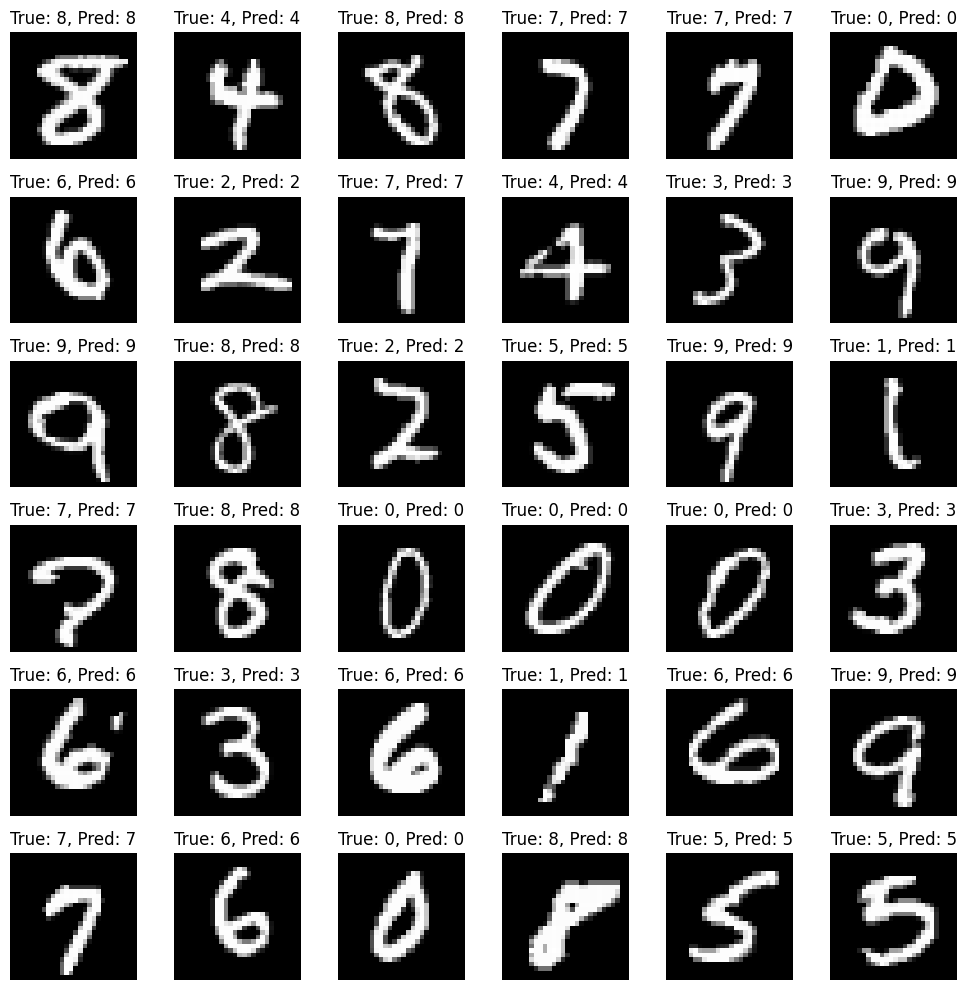

In [8]:
import numpy as np

# Ensure y_test and y_pred are NumPy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot a few sample images with their predicted and true labels
fig, axes = plt.subplots(6, 6, figsize=(10, 10))

# Rescale the data for visualization (reverse of standardization)
X_test_rescaled = scaler.inverse_transform(X_test)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test_rescaled[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
